## **1. Exploratory Data Analysis**

### 1.1 Melihat Data secara Keseluruhan

In [1]:
# Dataset Training
import pandas as pd
df_train = pd.read_csv("train.csv")
df_train.head()

,measurement_id,depth_reading_time,water_temperature_50m,salinity_50m,oxygen_saturation_50m,perceived_water_density,sediment_deposition,seafloor_pressure,plankton_density,microplankton_density,...,significant_wave_height (m),bottom_current_shear_stress (Pa),sound_speed_water (m s-1),acoustic_backscatter_intensity (dB),turbidity (NTU),light_attenuation_coefficient_Kd (m⁻¹),bioluminescence_intensity (photons cm-2 s-1),Brunt_Vaisala_frequency_squared (s-2),mixed_layer_depth (m),hydrostatic_pressure
0,16356,2023-11-13 11:00:00,304.05,21.7,"22,6","36,7",NaN,NaN,39.0,NaN,...,0.401154,0.015067,1504.138019,-66.767810,2.952915,0.384820,2538.261209,0.000076,NaN,1.0126
1,19332,NaN,NaN,20.2,"22,2","33,1",0.1,0.9883,33.0,20.0,...,1.481549,0.007174,1491.318842,-63.139064,7.009667,0.862321,3134.133126,0.000043,13.230404,1.0120
2,6357,2022-09-22 20:00:00,297.25,12.4,NaN,29,"0,1",0.9879,98.0,57.0,...,0.100000,0.013852,1488.067501,-84.915545,0.865869,0.146561,21936.465969,0.000186,93.919612,1.0120
3,15781,NaN,NaN,25.6,NaN,"36,4",NaN,0.9886,11.0,NaN,...,0.100000,0.009847,1507.774767,NaN,1.603203,0.184376,681.709644,0.000039,86.371817,1.0120
4,17022,2023-12-11 05:00:00,296.75,13.6,"21,5","27,8",NaN,0.9862,92.0,89.0,...,0.675384,0.009419,1500.014574,-59.258579,4.589184,0.622330,346225.838155,0.000032,NaN,1.0103


In [2]:
# Dataset Testing
df_test = pd.read_csv("test.csv")
df_test.head()

,measurement_id,depth_reading_time,water_temperature_50m,salinity_50m,oxygen_saturation_50m,perceived_water_density,sediment_deposition,seafloor_pressure,plankton_density,microplankton_density,...,sea_surface_height_anomaly (cm),significant_wave_height (m),bottom_current_shear_stress (Pa),sound_speed_water (m s-1),acoustic_backscatter_intensity (dB),turbidity (NTU),light_attenuation_coefficient_Kd (m⁻¹),bioluminescence_intensity (photons cm-2 s-1),Brunt_Vaisala_frequency_squared (s-2),mixed_layer_depth (m)
0,7102,2022-10-23 21:00:00,297.05,13.0,"22,2","27,7",0,0.9890,NaN,29.0,...,NaN,0.100000,0.003546,1507.920597,-74.648150,1.734582,0.261459,NaN,0.000140,85.439005
1,14935,2023-09-15 06:00:00,NaN,14.2,"16,8","21,2",0,0.9904,90.0,100.0,...,-17.949206,0.100000,0.040274,1517.126096,-82.550102,0.759634,0.137901,64.595111,0.000033,84.440373
2,16495,2023-11-19 06:00:00,296.35,11.2,"22,6","28,1","0,1",0.9888,93.0,97.0,...,0.290784,0.895821,0.009551,1508.050665,-67.976551,3.190862,NaN,12749.211822,0.000121,76.514184
3,10942,2023-04-01 21:00:00,NaN,14.2,"20,8","26,5",0,0.9875,38.0,NaN,...,-3.699932,NaN,0.024491,1493.570462,-64.463885,5.040131,0.651114,NaN,0.000118,10.000000
4,12600,2023-06-09 23:00:00,NaN,13.6,NaN,"28,2",0,0.9882,20.0,20.0,...,1.963447,2.326241,0.017023,1502.137240,-73.688667,1.494758,0.241723,NaN,0.000063,44.414882


In [ ]:
# for streamlit i want to see the minimum and maximum of each column in the training dataset
def get_min_max(df):
    min_max = {}
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            min_max[column] = {
                'min': df[column].min(),
                'max': df[column].max()
            }
    return min_max

min_max_train = get_min_max(df_train)
print("Minimum and Maximum values in Training Dataset:")
for column, values in min_max_train.items():
    print(f"{column}: Min = {values['min']}, Max = {values['max']}")

Minimum and Maximum values in Training Dataset:
measurement_id: Min = 2, Max = 21888
water_temperature_50m: Min = 290.35, Max = 307.45
salinity_50m: Min = 10.0, Max = 29.200000000000003
seafloor_pressure: Min = 0.981, Max = 0.9943
plankton_density: Min = 0.0, Max = 100.0
microplankton_density: Min = 0.0, Max = 100.0
mesoplankton_density: Min = 0.0, Max = 100.0
macroplankton_density: Min = 0.0, Max = 100.0
current_velocity_near_surface: Min = 0.0, Max = 16.875
current_velocity_deep: Min = 0.0, Max = 24.075000000000003
current_direction_near_surface: Min = 2.0, Max = 360.0
current_direction_deep: Min = 2.0, Max = 360.0
sediment_temperature_0_to_10cm: Min = 290.95, Max = 310.65
sediment_temperature_10_to_30cm: Min = 295.45, Max = 302.65
sediment_temperature_30_to_100cm: Min = 297.15, Max = 300.35
sediment_temperature_100_to_250cm: Min = 297.85, Max = 299.45
blue_light_penetration: Min = 0.0, Max = 1029.0
downwelling_light: Min = 0.0, Max = 930.0
scattered_light: Min = 0.0, Max = 481.0
is_

: 

### 1.2 Melihat dimensi data (jumlah baris, jumlah kolom)

In [44]:
# Dataset Training
print(f"\nBentuk Dataset Training : {df_train.shape[0]} baris dan {df_train.shape[1]} kolom")


Bentuk Dataset Training : 15321 baris dan 53 kolom


In [45]:
# Dataset Testing
print(f"\nBentuk Dataset Training : {df_test.shape[0]} baris dan {df_test.shape[1]} kolom")


Bentuk Dataset Training : 6567 baris dan 53 kolom


### 1.3 Memeriksa Tipe Data dan Nilai Non-Null

In [46]:
# Dataset Training
print("\nInformasi Detail Dataset Training :")
df_train.info()


Informasi Detail Dataset Training :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15321 entries, 0 to 15320
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   measurement_id                                15321 non-null  int64  
 1   depth_reading_time                            12966 non-null  object 
 2   water_temperature_50m                         7314 non-null   float64
 3   salinity_50m                                  12010 non-null  float64
 4   oxygen_saturation_50m                         12338 non-null  object 
 5   perceived_water_density                       14331 non-null  object 
 6   sediment_deposition                           10296 non-null  object 
 7   seafloor_pressure                             12177 non-null  float64
 8   plankton_density                              10125 non-null  float64
 9   microplankton_density   

In [47]:
# Dataset Training
print("\nInformasi Detail Dataset Testing :")
df_test.info()


Informasi Detail Dataset Testing :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6567 entries, 0 to 6566
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   measurement_id                                6567 non-null   int64  
 1   depth_reading_time                            5604 non-null   object 
 2   water_temperature_50m                         3061 non-null   float64
 3   salinity_50m                                  5100 non-null   float64
 4   oxygen_saturation_50m                         5313 non-null   object 
 5   perceived_water_density                       6150 non-null   object 
 6   sediment_deposition                           4461 non-null   object 
 7   seafloor_pressure                             5278 non-null   float64
 8   plankton_density                              4427 non-null   float64
 9   microplankton_density      

### 1.4 Kuantifikasi Nilai Hilang

In [48]:
print("\nJumlah Nilai Hilang per Kolom (Dataset Training): ")
print(df_train.isnull().sum())


Jumlah Nilai Hilang per Kolom (Dataset Training): 
measurement_id                                     0
depth_reading_time                              2355
water_temperature_50m                           8007
salinity_50m                                    3311
oxygen_saturation_50m                           2983
perceived_water_density                          990
sediment_deposition                             5025
seafloor_pressure                               3144
plankton_density                                5196
microplankton_density                           4321
mesoplankton_density                            3897
macroplankton_density                           2699
dissolved_gas_pressure                          2611
current_velocity_near_surface                   5486
current_velocity_deep                           2883
current_direction_near_surface                  3236
current_direction_deep                          3377
current_turbulence                             

In [49]:
# Dataset Testing
print("\nJumlah Nilai Hilang per Kolom (Dataset Testing): ")
print(df_test.isnull().sum())


Jumlah Nilai Hilang per Kolom (Dataset Testing): 
measurement_id                                     0
depth_reading_time                               963
water_temperature_50m                           3506
salinity_50m                                    1467
oxygen_saturation_50m                           1254
perceived_water_density                          417
sediment_deposition                             2106
seafloor_pressure                               1289
plankton_density                                2140
microplankton_density                           1831
mesoplankton_density                            1633
macroplankton_density                           1138
dissolved_gas_pressure                          1125
current_velocity_near_surface                   2341
current_velocity_deep                           1235
current_direction_near_surface                  1383
current_direction_deep                          1391
current_turbulence                              

### 1.5 Analisis Univariat (Pembedahan Setiap Variabel)

#### 1.5.1 Analisis Variabel Target (hydrostatic_pressure)

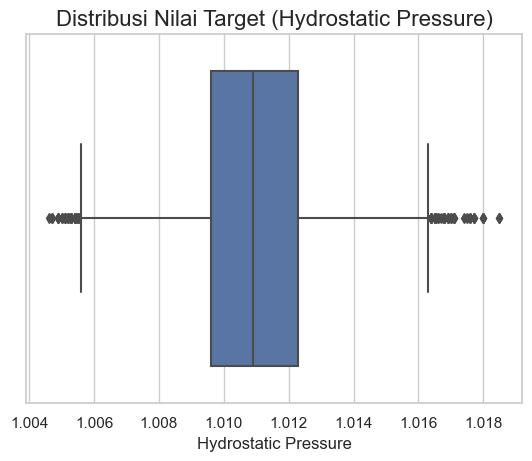

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melihat distribusi dari satu variabel numerik
sns.boxplot(data=df_train, x='hydrostatic_pressure')

plt.title('Distribusi Nilai Target (Hydrostatic Pressure)', fontsize=16)
plt.xlabel('Hydrostatic Pressure')
plt.show()

#### 1.5.2 Analisis Fitur Numerik

In [51]:
import matplotlib.pyplot as plt

def plot_numerical_histograms(df, bins=30, figsize=(15, 10), color='skyblue'):
    """
    Menampilkan histogram untuk setiap kolom numerik dalam DataFrame.
    
    Parameters:
    - df (pd.DataFrame): DataFrame yang ingin dianalisis.
    - bins (int): Jumlah bin pada histogram.
    - figsize (tuple): Ukuran figure untuk plot secara keseluruhan.
    - color (str): Warna bar histogram.
    """
    numerical_cols = df.select_dtypes(include=['number']).columns
    num_cols = len(numerical_cols)
    
    if num_cols == 0:
        print("Tidak ada kolom numerik dalam DataFrame.")
        return
    
    # Tentukan jumlah baris dan kolom subplot (maks 3 kolom per baris)
    ncols = 3
    nrows = (num_cols + ncols - 1) // ncols  # Pembulatan ke atas

    plt.figure(figsize=figsize)
    
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(nrows, ncols, i)
        plt.hist(df[col].dropna(), bins=bins, color=color, edgecolor='black')
        plt.title(col)
        plt.xlabel('Value')
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

C:\Users\user id\AppData\Local\Temp\ipykernel_11616\2231467499.py:33: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from current font.
  plt.tight_layout()
C:\Users\user id\AppData\Local\Temp\ipykernel_11616\2231467499.py:33: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
c:\Users\user id\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


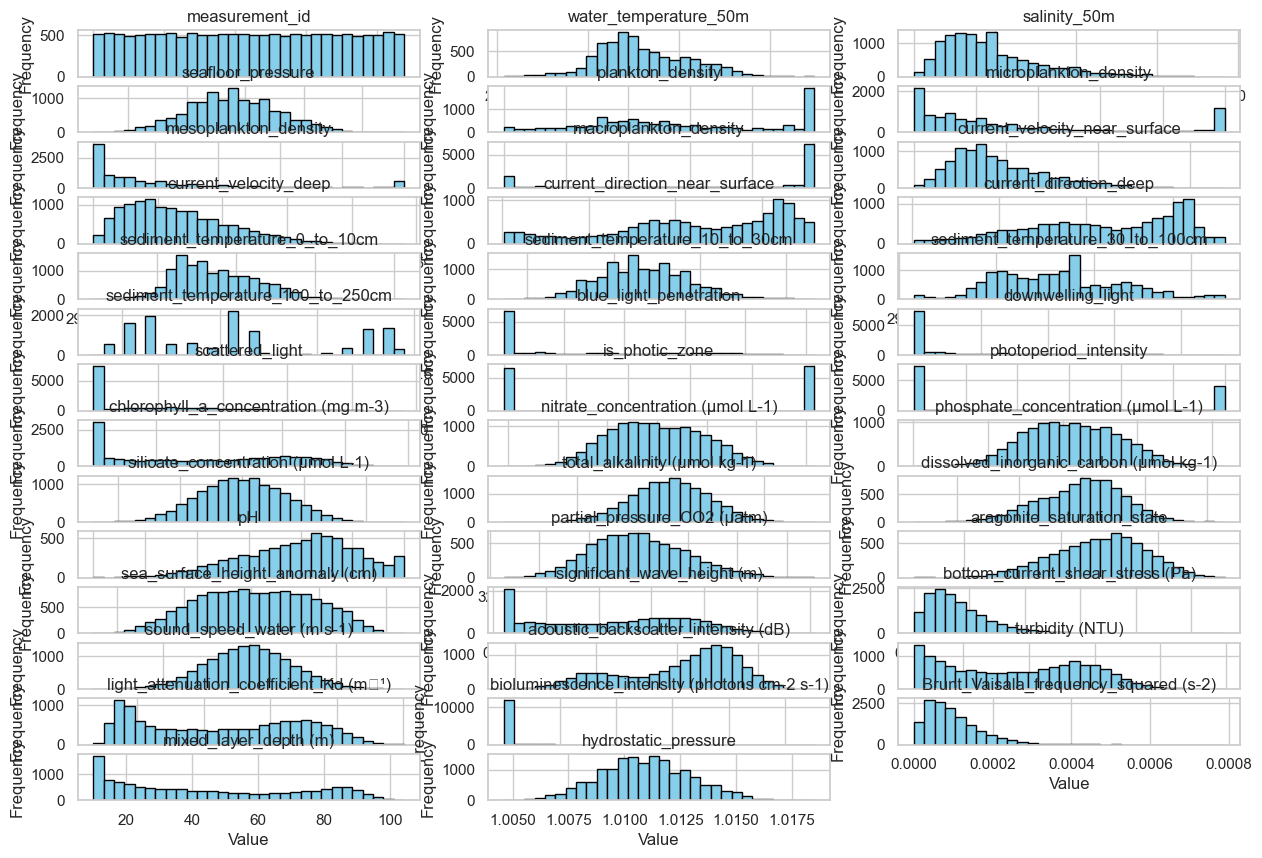

In [52]:
# Dataset Training
plot_numerical_histograms(df_train)

C:\Users\user id\AppData\Local\Temp\ipykernel_11616\2231467499.py:33: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from current font.
  plt.tight_layout()
C:\Users\user id\AppData\Local\Temp\ipykernel_11616\2231467499.py:33: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
c:\Users\user id\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


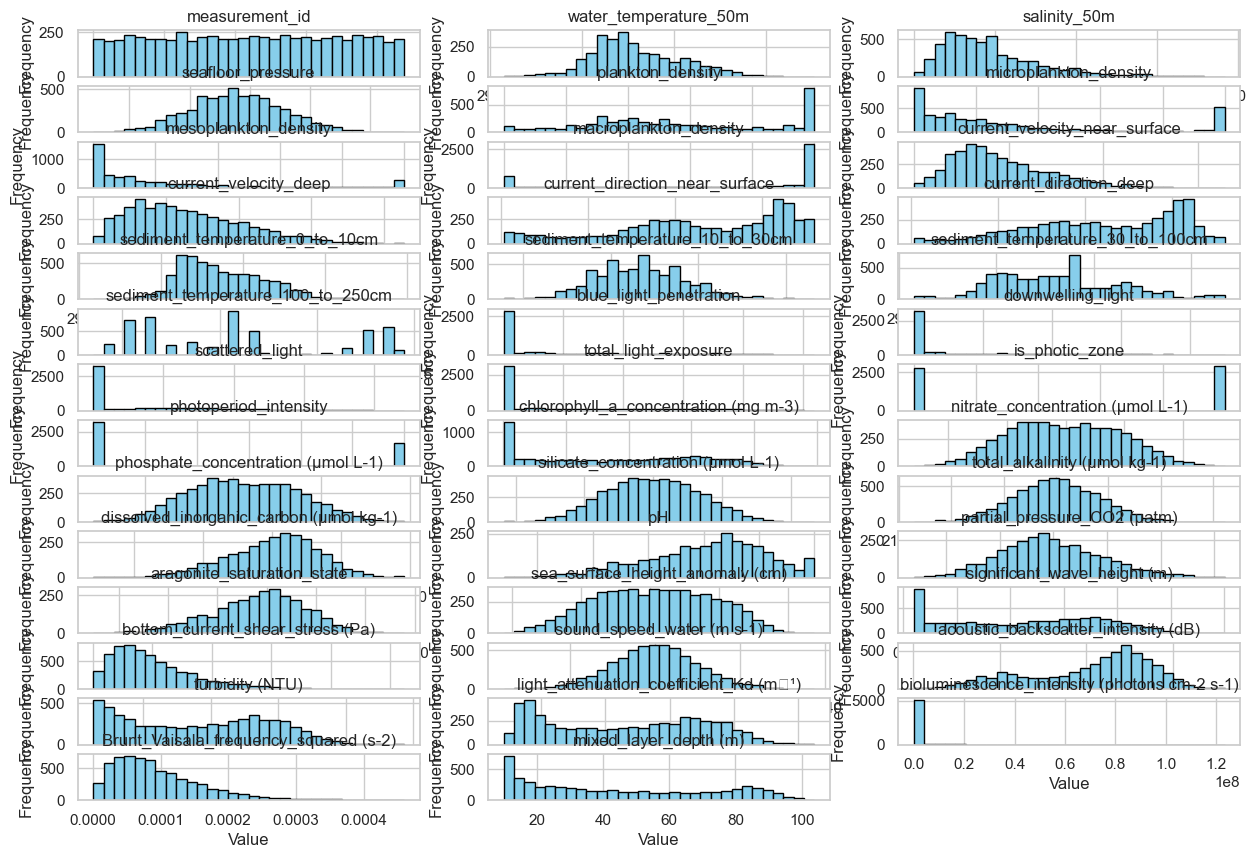

In [53]:
# Dataset Testing
plot_numerical_histograms(df_test)

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def boxplot(df, figsize=(15, 10), palette='viridis'):
    """
    Menampilkan box plot untuk setiap kolom numerik dalam DataFrame 
    dalam satu figure menggunakan grid subplot.

    Parameters:
    - df (pd.DataFrame): DataFrame yang ingin dianalisis.
    - figsize (tuple): Ukuran figure untuk plot secara keseluruhan.
    - palette (str): Palet warna untuk box plot.
    """
    # Atur tema visual Seaborn
    sns.set_theme(style="whitegrid")
    
    # 1. Pilih hanya kolom numerik
    numerical_cols = df.select_dtypes(include=np.number).columns
    num_cols = len(numerical_cols)
    
    if num_cols == 0:
        print("Tidak ada kolom numerik dalam DataFrame.")
        return
        
    # 2. Tentukan layout grid (maksimal 3 kolom per baris)
    ncols = 3
    nrows = (num_cols + ncols - 1) // ncols # Pembulatan ke atas

    # 3. Buat figure dan axes (subplot) tunggal
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    
    # "Flatten" array axes agar mudah di-loop, bahkan jika hanya ada satu baris
    axes = axes.flatten() 
    
    # 4. Loop melalui setiap kolom dan plot pada subplot yang sesuai
    for i, col in enumerate(numerical_cols):
        sns.boxplot(y=df[col], ax=axes[i], palette=palette)
        axes[i].set_title(f'Box Plot untuk {col}', fontsize=14)
        axes[i].set_ylabel('Nilai', fontsize=10)
        axes[i].set_xlabel('') # Menghilangkan label x yang tidak perlu
    
    # 5. Sembunyikan subplot yang tidak terpakai
    # Jika jumlah plot 5 dan grid 2x3, subplot ke-6 akan disembunyikan
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
        
    # 6. Rapikan layout dan tampilkan
    plt.tight_layout()
    plt.show()

C:\Users\user id\AppData\Local\Temp\ipykernel_11616\2710454717.py:49: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from current font.
  plt.tight_layout()
c:\Users\user id\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


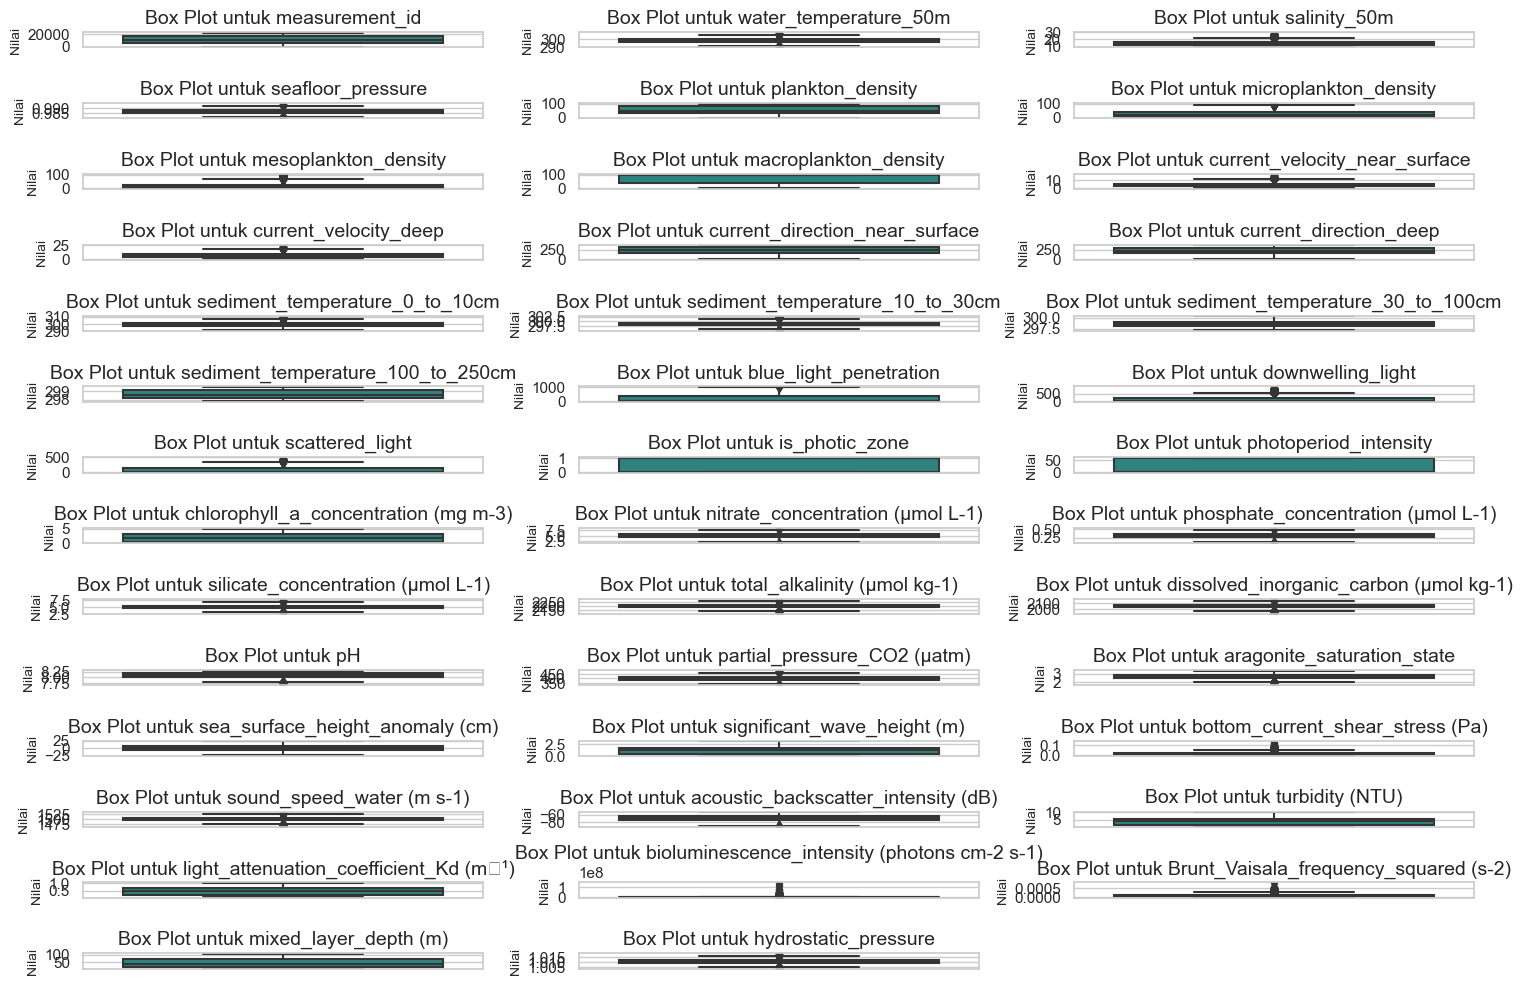

In [55]:
# Dataset Training
boxplot(df_train)

C:\Users\user id\AppData\Local\Temp\ipykernel_11616\2710454717.py:49: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from current font.
  plt.tight_layout()
c:\Users\user id\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


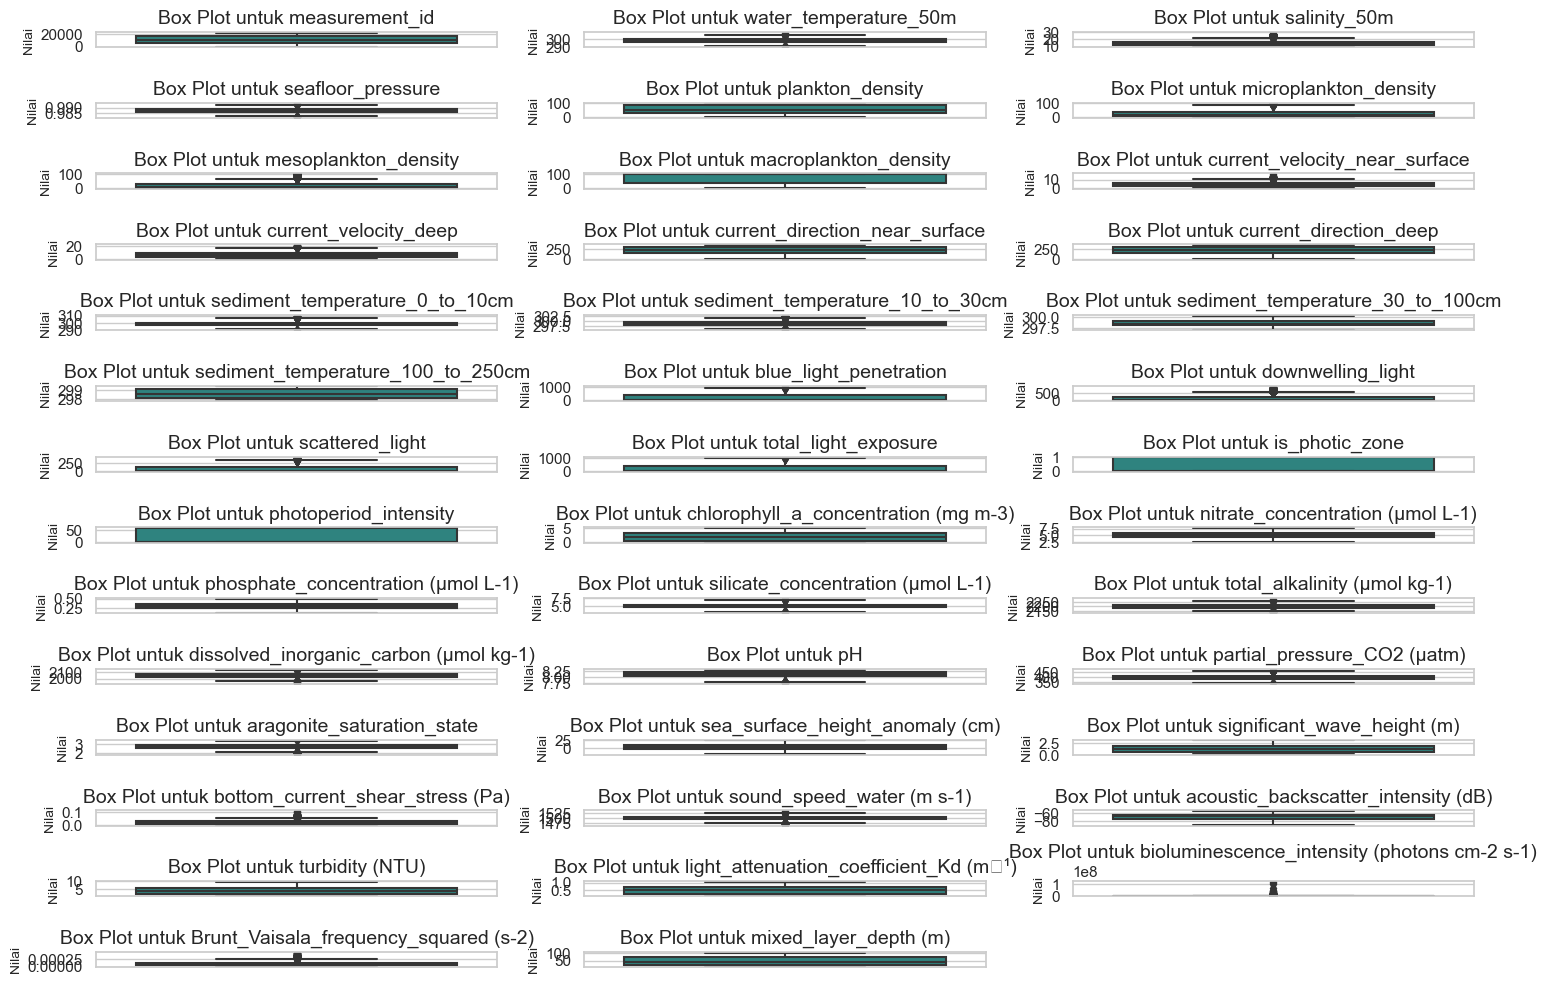

In [56]:
# Dataset Testing
boxplot(df_test)

### 1.7 Hubungan antar Fitur Numerik (Korelasi)

c:\Users\user id\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from current font.
  fig.canvas.draw()
c:\Users\user id\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


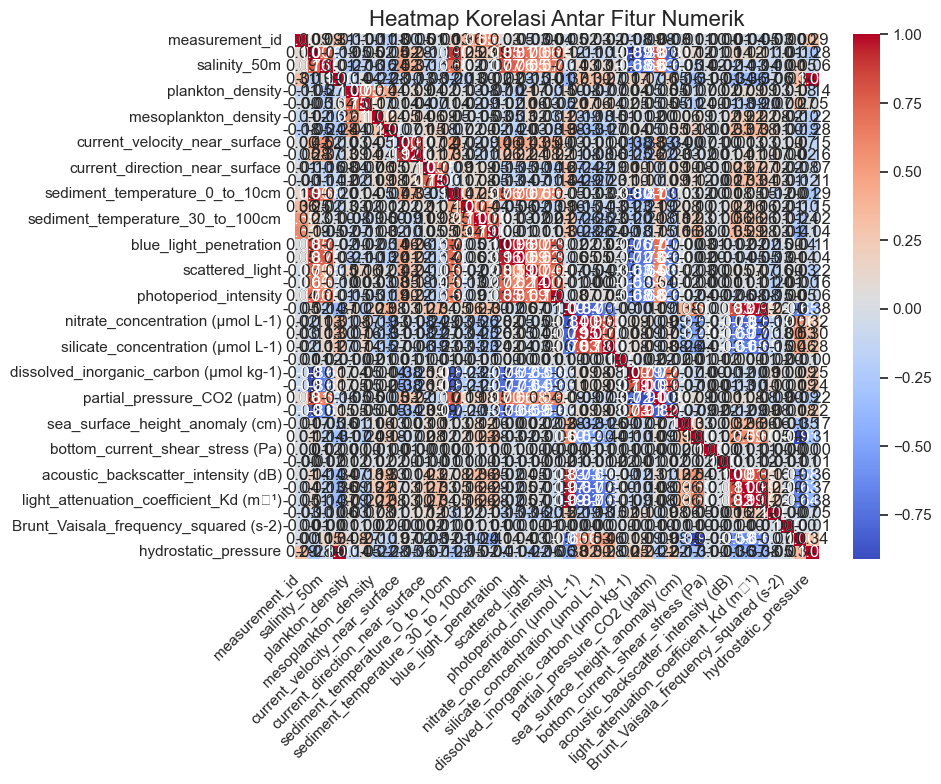

In [57]:
# Dataset Training
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih seluruh kolom numerik secara otomatis
numerik_df = df_train.select_dtypes(include=['int64', 'float64'])

# Hitung matriks korelasi
correlation_matrix = numerik_df.corr()

# Visualisasikan dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap Korelasi Antar Fitur Numerik', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

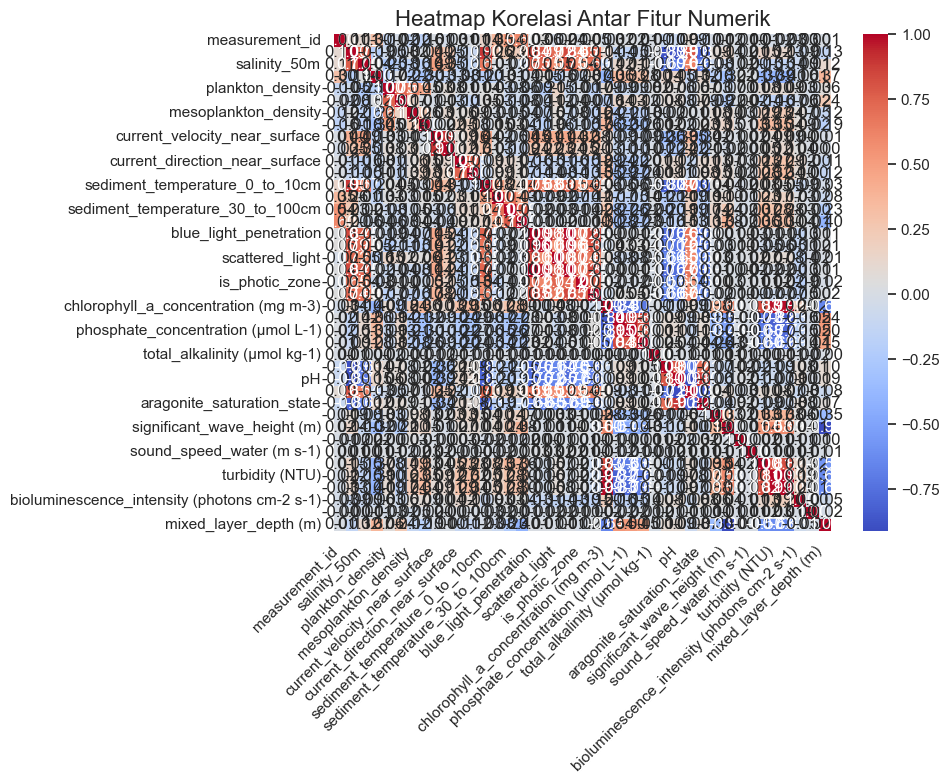

In [58]:
# Dataset Testing
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih seluruh kolom numerik secara otomatis
numerik_df = df_test.select_dtypes(include=['int64', 'float64'])

# Hitung matriks korelasi
correlation_matrix = numerik_df.corr()

# Visualisasikan dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap Korelasi Antar Fitur Numerik', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 1.8 Kesimpulan Permasalahan Dataset
1. Terdapat null-value
2. Terdapat beberapa kolom kategorikal yang harus melalui proses encoding
3. Terdapat kolom yang perlu diekstrak
4. Terdapat outlier dari fitur-fitur numerik yang ada

## **2. Data Preprocessing Menggunakan Pipeline**

In [63]:
# ==============================================================================
# Bagian 1: Impor Semua Library yang Dibutuhkan
# ==============================================================================
import pandas as pd
import numpy as np

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector

# ==============================================================================
# Bagian 2: Definisi Kelas Transformer Kustom (Tidak ada perubahan)
# ==============================================================================
class InitialFeatureEngineer(BaseEstimator, TransformerMixin):
    """
    Transformer untuk melakukan pembersihan dan rekayasa fitur awal:
    1. Mengonversi kolom numerik dari string (dengan koma) ke float.
    2. Mengekstrak fitur (tahun, bulan, hari, jam) dari kolom datetime.
    """
    def __init__(self, numeric_cols, datetime_col="depth_reading_time"):
        self.numeric_cols = numeric_cols
        self.datetime_col = datetime_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in self.numeric_cols:
            if col in X_copy.columns:
                X_copy[col] = pd.to_numeric(
                    X_copy[col].astype(str).str.replace(",", ".", regex=False),
                    errors='coerce'
                )
        if self.datetime_col in X_copy.columns:
            dt_series = pd.to_datetime(X_copy[self.datetime_col], errors='coerce')
            X_copy["year"] = dt_series.dt.year
            X_copy["month"] = dt_series.dt.month
            X_copy["day"] = dt_series.dt.day
            X_copy["hour"] = dt_series.dt.hour
            X_copy.drop(columns=[self.datetime_col], inplace=True)
        return X_copy

# ==============================================================================
# Bagian 3: Definisi Kolom dan Perakitan Pipeline Utama (Tidak ada perubahan)
# ==============================================================================
kolom_numerik_awal = [
    "oxygen_saturation_50m", "perceived_water_density", "sediment_deposition",
    "dissolved_gas_pressure", "current_turbulence", "sediment_porosity_0_to_10cm",
    "sediment_porosity_10_to_30cm", "sediment_porosity_30_to_100cm",
    "sediment_porosity_100_to_250cm", "perpendicular_light_intensity",
    "thermal_emissions"
]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('all_numerics', numeric_transformer, make_column_selector(dtype_include=np.number))
    ],
    remainder='passthrough'
)

final_full_pipeline = Pipeline(steps=[
    ('feature_engineering', InitialFeatureEngineer(numeric_cols=kolom_numerik_awal, datetime_col="depth_reading_time")),
    ('processing', preprocessor)
])

print("✅ Pipeline preprocessing lengkap telah berhasil dibuat!")

✅ Pipeline preprocessing lengkap telah berhasil dibuat!


In [64]:
# Pemisahan fitur dengan target
target_column = 'hydrostatic_pressure'

X_train = df_train.drop(columns=[target_column])
y_train = df_train[target_column]
X_test = df_test

In [65]:
# Dataset Training
X_train_processed = final_full_pipeline.fit_transform(X_train)
processed_cols = final_full_pipeline.named_steps['processing'].get_feature_names_out()
X_train_final = pd.DataFrame(X_train_processed, columns=processed_cols)
print("Fitur Training Selesai Diproses:")
X_train_final.info()

Fitur Training Selesai Diproses:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15321 entries, 0 to 15320
Data columns (total 55 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   all_numerics__measurement_id                                15321 non-null  float64
 1   all_numerics__water_temperature_50m                         15321 non-null  float64
 2   all_numerics__salinity_50m                                  15321 non-null  float64
 3   all_numerics__oxygen_saturation_50m                         15321 non-null  float64
 4   all_numerics__perceived_water_density                       15321 non-null  float64
 5   all_numerics__sediment_deposition                           15321 non-null  float64
 6   all_numerics__seafloor_pressure                             15321 non-null  float64
 7   all_numerics__plankton_density                      

In [67]:
# Dataset Testing 
X_test_processed = final_full_pipeline.transform(X_test)
X_test_final = pd.DataFrame(X_test_processed, columns=processed_cols)
print("Fitur Testing Selesai Diproses:")
X_test_final.info()

Fitur Testing Selesai Diproses:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6567 entries, 0 to 6566
Data columns (total 55 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   all_numerics__measurement_id                                6567 non-null   float64
 1   all_numerics__water_temperature_50m                         6567 non-null   float64
 2   all_numerics__salinity_50m                                  6567 non-null   float64
 3   all_numerics__oxygen_saturation_50m                         6567 non-null   float64
 4   all_numerics__perceived_water_density                       6567 non-null   float64
 5   all_numerics__sediment_deposition                           6567 non-null   float64
 6   all_numerics__seafloor_pressure                             6567 non-null   float64
 7   all_numerics__plankton_density                         

## 3. **Modelling & Hyperparameter Tuning Menggunakan Pipeline**

[I 2025-06-08 18:56:22,969] A new study created in memory with name: no-name-a8f818d3-fe3e-4adb-9710-f25ae0535119


Data dibagi untuk tuning: 12256 baris training, 3065 baris validasi.
Memulai Hyperparameter tuning dengan Optuna...


[I 2025-06-08 19:12:56,720] Trial 0 finished with value: 0.9510412402079005 and parameters: {'learning_rate': 0.03574712922600244, 'depth': 10, 'l2_leaf_reg': 7.587945476302646, 'subsample': 0.8394633936788146}. Best is trial 0 with value: 0.9510412402079005.
[I 2025-06-08 19:14:03,866] Trial 1 finished with value: 0.9439361639541719 and parameters: {'learning_rate': 0.01700037298921102, 'depth': 5, 'l2_leaf_reg': 1.5227525095137953, 'subsample': 0.9464704583099741}. Best is trial 0 with value: 0.9510412402079005.
[I 2025-06-08 19:17:22,263] Trial 2 finished with value: 0.953931451434447 and parameters: {'learning_rate': 0.07725378389307355, 'depth': 8, 'l2_leaf_reg': 1.185260448662222, 'subsample': 0.9879639408647978}. Best is trial 2 with value: 0.953931451434447.
[I 2025-06-08 19:18:02,940] Trial 3 finished with value: 0.9512917614635404 and parameters: {'learning_rate': 0.16967533607196555, 'depth': 5, 'l2_leaf_reg': 2.636424704863906, 'subsample': 0.6733618039413735}. Best is tria


Best R² from tuning: 0.9539
Best Parameters: {'learning_rate': 0.07725378389307355, 'depth': 8, 'l2_leaf_reg': 1.185260448662222, 'subsample': 0.9879639408647978}
Melatih model final pada seluruh data training (X_train_final)...
Model final berhasil disimpan ke 'catboost_model_final.pkl'
--------------------------------------------------
R² on validation set using final model: 0.9294


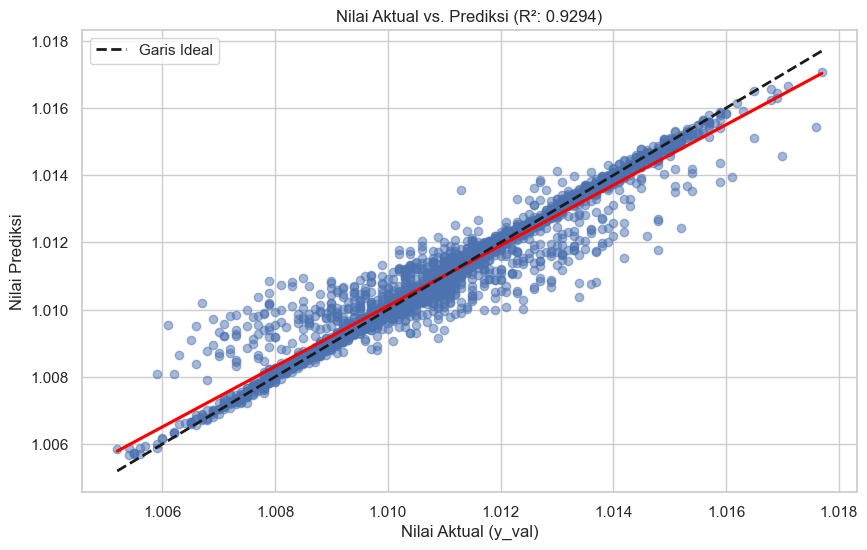

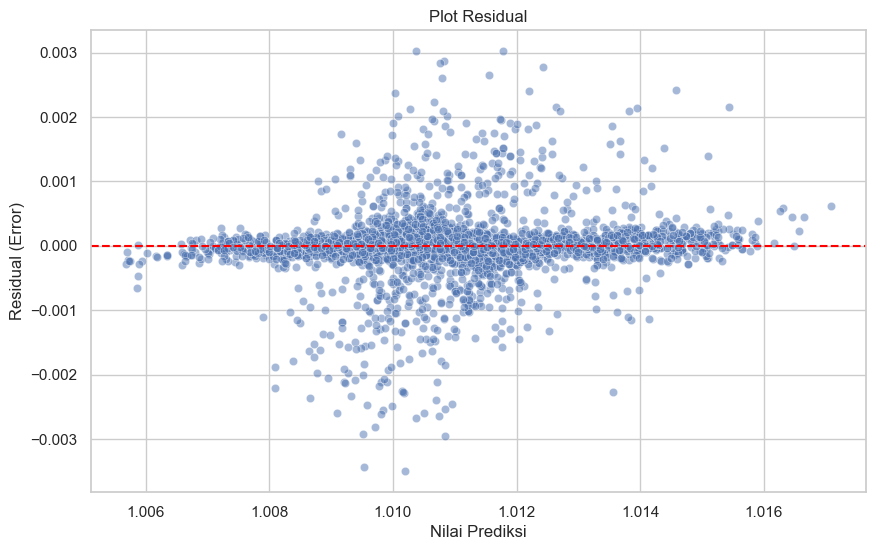


Membuat prediksi pada X_test_final...
Prediksi pada data test selesai. Contoh 5 prediksi pertama:
[1.01316687 1.0148744  1.01287737 1.01165806 1.01233536]


In [68]:
# ==============================================================================
# Bagian 1: Impor Library yang Dibutuhkan
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # Untuk menyimpan dan memuat model

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from catboost import CatBoostRegressor
import optuna
from optuna.samplers import TPESampler


# ==============================================================================
# Bagian 2: Siapkan Data untuk Proses Tuning (Split ke Validation Set)
# ==============================================================================
# Kita perlu membagi data training Anda menjadi set training baru dan set validasi
# untuk digunakan oleh Optuna dalam mengevaluasi setiap trial.
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train_final, y_train, test_size=0.2, random_state=42
)

print(f"Data dibagi untuk tuning: {len(X_train_split)} baris training, {len(X_val)} baris validasi.")

# ==============================================================================
# Bagian 3: Hyperparameter Tuning Langsung pada Model CatBoost
# ==============================================================================
def objective(trial):
    # Langsung definisikan parameter untuk CatBoostRegressor
    params = {
        "iterations": 3000,
        "early_stopping_rounds": 100,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "random_seed": 42,
        "verbose": 0
    }

    model = CatBoostRegressor(**params)
    
    # Latih model pada data training hasil split
    model.fit(X_train_split, y_train_split, eval_set=[(X_val, y_val)], use_best_model=True)
    
    # Prediksi pada data validasi
    preds = model.predict(X_val)
    
    return r2_score(y_val, preds) # Optuna akan memaksimalkan R²

print("Memulai Hyperparameter tuning dengan Optuna...")
study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
study.optimize(objective, n_trials=10, timeout=1800) # n_trials bisa disesuaikan

best_params = study.best_params
print(f"\nBest R² from tuning: {study.best_value:.4f}")
print("Best Parameters:", best_params)


# ==============================================================================
# Bagian 4: Latih Model Final pada Seluruh Data Training & Simpan
# ==============================================================================
print("Melatih model final pada seluruh data training (X_train_final)...")

# Buat instance model final dengan parameter terbaik
final_model = CatBoostRegressor(
    iterations=100,
    early_stopping_rounds=10,
    random_seed=42,
    verbose=0,
    **best_params
)

# Latih model pada SELURUH data training yang Anda miliki
# (tanpa validation set, karena kita sudah dapat parameter terbaik)
final_model.fit(X_train_final, y_train)

# Simpan model yang sudah terlatih ke file .pkl
model_filename = "catboost_model_final.pkl"
joblib.dump(final_model, model_filename)
print(f"Model final berhasil disimpan ke '{model_filename}'")
print("-" * 50)


# ==============================================================================
# Bagian 5: Evaluasi Model Final dan Prediksi
# ==============================================================================
# Muat kembali model untuk demonstrasi
loaded_model = joblib.load(model_filename)

# Evaluasi pada set validasi yang tadi kita buat
y_pred_val = loaded_model.predict(X_val)
r2_final = r2_score(y_val, y_pred_val)
print(f"R² on validation set using final model: {r2_final:.4f}")

# --- Visualisasi Evaluasi (Pengganti Confusion Matrix) ---

# Actual vs. Predicted Plot
plt.figure(figsize=(10, 6))
sns.regplot(x=y_val, y=y_pred_val, ci=None, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2, label='Garis Ideal')
plt.xlabel("Nilai Aktual (y_val)")
plt.ylabel("Nilai Prediksi")
plt.title("Nilai Aktual vs. Prediksi (R²: {:.4f})".format(r2_final))
plt.legend()
plt.grid(True)
plt.show()

# Residuals Plot
residuals = y_val - y_pred_val
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_val, y=residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Nilai Prediksi")
plt.ylabel("Residual (Error)")
plt.title("Plot Residual")
plt.grid(True)
plt.show()

# --- Contoh Prediksi pada Data Test ---
print("\nMembuat prediksi pada X_test_final...")
test_predictions = loaded_model.predict(X_test_final)
print("Prediksi pada data test selesai. Contoh 5 prediksi pertama:")
print(test_predictions[:5])